In [4]:
# ===================================================================
# PASO 1: CONFIGURACIÓN E INSTALACIÓN DE LIBRERÍAS
# ===================================================================

import pandas as pd
import requests
import sqlite3

print("✅ Librerías importadas.")

# ===================================================================
# PASO 2: EXTRACCIÓN (EXTRACT) DE LOS DATOS
# ===================================================================

# La plataforma datos.gov.co usa la API de Socrata. Podemos usarla para
# descargar los datos directamente, lo que es más eficiente que bajar un CSV.
# Aumentamos el límite para traer más filas (ajusta si es necesario).
api_url = "https://www.datos.gov.co/resource/rpmr-utcd.json"

print(f"📥 Extrayendo datos desde: {api_url}")

try:
    response = requests.get(api_url)
    response.raise_for_status()  # Lanza un error si la petición falla (ej: 404)
    data = response.json()
    df_raw = pd.DataFrame(data)
    print(f"✅ ¡Extracción exitosa! Se cargaron {len(df_raw)} filas.")
    display(df_raw.head())

except requests.exceptions.RequestException as e:
    print(f"❌ Error al extraer los datos: {e}")
    df_raw = pd.DataFrame() # Creamos un dataframe vacío para evitar errores posteriores

except Exception as e:
    print(f"❌ Ocurrió un error inesperado: {e}")
    df_raw = pd.DataFrame()




✅ Librerías importadas.
📥 Extrayendo datos desde: https://www.datos.gov.co/resource/rpmr-utcd.json
✅ ¡Extracción exitosa! Se cargaron 1000 filas.


,nivel_entidad,codigo_entidad_en_secop,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,...,fecha_inicio_ejecuci_n,fecha_fin_ejecuci_n,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,tipo_documento_proveedor,documento_proveedor
0,TERRITORIAL,268000052,SANTANDER - UNIDADES TECNOLÓGICAS DE SANTANDER,890208727,Santander,Bucaramanga,Terminado sin Liquidar,Contratación Directa (Ley 1150 de 2007),PRESTAR SERVICIOS PROFESIONALES DE APOYO A LOS...,PRESTAR SERVICIOS PROFESIONALES DE APOYO A LOS...,...,2017-09-07T00:00:00.000,2017-11-30T00:00:00.000,17-12-7050963,002667-17,5600000,URIBE SIZA WILLIAM,https://www.contratos.gov.co/consultas/detalle...,SECOPI,Cédula de Ciudadanía,91256115
1,TERRITORIAL,268000052,SANTANDER - UNIDADES TECNOLÓGICAS DE SANTANDER,890208727,Santander,Bucaramanga,Terminado sin Liquidar,Contratación Directa (Ley 1150 de 2007),PRESTAR SERVICIOS PROFESIONALES DE APOYO A LOS...,PRESTAR SERVICIOS PROFESIONALES DE APOYO A LOS...,...,2017-09-11T00:00:00.000,2017-12-30T00:00:00.000,17-12-7056282,002677-17,4800000,GARCIA GELVEZ JAVIER,https://www.contratos.gov.co/consultas/detalle...,SECOPI,Cédula de Ciudadanía,91240563
2,TERRITORIAL,268000052,SANTANDER - UNIDADES TECNOLÓGICAS DE SANTANDER,890208727,Santander,Bucaramanga,Terminado sin Liquidar,Contratación Directa (Ley 1150 de 2007),PRESTAR SERVICIOS PROFESIONALES DE APOYO A LOS...,PRESTAR SERVICIOS PROFESIONALES DE APOYO A LOS...,...,2018-01-25T00:00:00.000,2018-04-28T00:00:00.000,18-12-7725618,000349-18,5580000,GARCIA GELVEZ JAVIER,https://www.contratos.gov.co/consultas/detalle...,SECOPI,Cédula de Ciudadanía,91240563
3,TERRITORIAL,268000052,SANTANDER - UNIDADES TECNOLÓGICAS DE SANTANDER,890208727,Santander,Bucaramanga,Terminado sin Liquidar,Contratación Directa (Ley 1150 de 2007),PRESTAR SERVICIOS PROFESIONALES DE APOYO A LOS...,PRESTAR SERVICIOS PROFESIONALES DE APOYO A LOS...,...,2018-01-25T00:00:00.000,2018-06-22T00:00:00.000,18-12-7731482,000545-18,14000000,DIANA MARCELA RODRIGUEZ GOMEZ,https://www.contratos.gov.co/consultas/detalle...,SECOPI,Cédula de Ciudadanía,37724226
4,TERRITORIAL,268000052,SANTANDER - UNIDADES TECNOLÓGICAS DE SANTANDER,890208727,Santander,Bucaramanga,Terminado sin Liquidar,Contratación Directa (Ley 1150 de 2007),PRESTAR SERVICIOS PROFESIONALES DE APOYO A LOS...,PRESTAR SERVICIOS PROFESIONALES DE APOYO A LOS...,...,2018-08-14T00:00:00.000,2018-12-27T00:00:00.000,18-12-8348160,002410-18,10850000,GOMEZ LIZARAZO CESAR AUGUSTO,https://www.contratos.gov.co/consultas/detalle...,SECOPI,Cédula de Ciudadanía,13835118


In [5]:
df = pd.read_json(url)

# Mostrar las primeras filas
df.head()

,nivel_entidad,codigo_entidad_en_secop,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,...,fecha_inicio_ejecuci_n,fecha_fin_ejecuci_n,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,tipo_documento_proveedor,documento_proveedor
0,TERRITORIAL,205000052,ANTIOQUIA - UNIVERSIDAD DE ANTIOQUIA,890980040,Antioquia,Medellín,Celebrado,Régimen Especial,ADQUIRIR LOS DERECHOS DE USO O REPRODUCCION DE...,ADQUIRIR LOS DERECHOS DE USO O REPRODUCCIoN DE...,...,2021-02-17T00:00:00.000,2021-03-19T00:00:00.000,21-4-11704184,Contrato_PEDIDO_4500094287_2021_Wilson,484544,WILSON PEREZ URIBE,https://www.contratos.gov.co/consultas/detalle...,SECOPI,Nit de Persona Natural,1035831594
1,TERRITORIAL,205000052,ANTIOQUIA - UNIVERSIDAD DE ANTIOQUIA,890980040,Antioquia,Medellín,Celebrado,Régimen Especial,ADQUIRIR LOS DERECHOS DE USO O REPRODUCCION DE...,ADQUIRIR LOS DERECHOS DE USO O REPRODUCCIoN DE...,...,2021-02-17T00:00:00.000,2021-03-19T00:00:00.000,21-4-11711133,Contrato_PEDIDO_4500094283_2021_Martha,484544,MARTHA CECILIA RENZA VILLANUEVA,https://www.contratos.gov.co/consultas/detalle...,SECOPI,Nit de Persona Natural,41703329
2,TERRITORIAL,205000052,ANTIOQUIA - UNIVERSIDAD DE ANTIOQUIA,890980040,Antioquia,Medellín,Celebrado,Régimen Especial,ADQUIRIR LOS DERECHOS DE USO O REPRODUCCION DE...,ADQUIRIR LOS DERECHOS DE USO O REPRODUCCIoN DE...,...,2021-05-27T00:00:00.000,2021-05-31T00:00:00.000,21-4-12006082,Contrato_PEDIDO_4500096865_2021_Andres,151420,ANDRES ALVAREZ ARBOLEDA,https://www.contratos.gov.co/consultas/detalle...,SECOPI,Nit de Persona Natural,1036396681
3,TERRITORIAL,205000052,ANTIOQUIA - UNIVERSIDAD DE ANTIOQUIA,890980040,Antioquia,Medellín,Celebrado,Régimen Especial,ADQUIRIR LOS DERECHOS DE USO O REPRODUCCION DE...,ADQUIRIR LOS DERECHOS DE USO O REPRODUCCIoN DE...,...,2022-06-09T00:00:00.000,2022-06-18T00:00:00.000,22-4-13133070,Contrato_LIC_20340023_038_2022_Diego_4500107466,200000,DIEGO LEON OSPINA OSPINA,https://www.contratos.gov.co/consultas/detalle...,SECOPI,Nit de Persona Natural,71683179
4,TERRITORIAL,205000052,ANTIOQUIA - UNIVERSIDAD DE ANTIOQUIA,890980040,Antioquia,Medellín,Celebrado,Régimen Especial,ADQUIRIR LOS DERECHOS DE USO O REPRODUCCION DE...,ADQUIRIR LOS DERECHOS DE USO O REPRODUCCIoN DE...,...,2021-12-02T00:00:00.000,2021-12-09T00:00:00.000,21-4-12583780,Contrato_CPS_4500103215_2021_Miguel,908530,MIGUEL GUERRA GUERRERO,https://www.contratos.gov.co/consultas/detalle...,SECOPI,Nit de Persona Natural,1071164244


In [6]:
df.columns

Index(['nivel_entidad', 'codigo_entidad_en_secop', 'nombre_de_la_entidad',
       'nit_de_la_entidad', 'departamento_entidad', 'municipio_entidad',
       'estado_del_proceso', 'modalidad_de_contrataci_n', 'objeto_a_contratar',
       'objeto_del_proceso', 'tipo_de_contrato', 'fecha_de_firma_del_contrato',
       'fecha_inicio_ejecuci_n', 'fecha_fin_ejecuci_n', 'numero_del_contrato',
       'numero_de_proceso', 'valor_contrato', 'nom_raz_social_contratista',
       'url_contrato', 'origen', 'tipo_documento_proveedor',
       'documento_proveedor'],
      dtype='object')

In [7]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   nivel_entidad                1000 non-null   object
 1   codigo_entidad_en_secop      1000 non-null   int64 
 2   nombre_de_la_entidad         1000 non-null   object
 3   nit_de_la_entidad            1000 non-null   object
 4   departamento_entidad         1000 non-null   object
 5   municipio_entidad            1000 non-null   object
 6   estado_del_proceso           1000 non-null   object
 7   modalidad_de_contrataci_n    1000 non-null   object
 8   objeto_a_contratar           1000 non-null   object
 9   objeto_del_proceso           1000 non-null   object
 10  tipo_de_contrato             1000 non-null   object
 11  fecha_de_firma_del_contrato  986 non-null    object
 12  fecha_inicio_ejecuci_n       984 non-null    object
 13  fecha_fin_ejecuci_n          986 n

nivel_entidad                   0
codigo_entidad_en_secop         0
nombre_de_la_entidad            0
nit_de_la_entidad               0
departamento_entidad            0
municipio_entidad               0
estado_del_proceso              0
modalidad_de_contrataci_n       0
objeto_a_contratar              0
objeto_del_proceso              0
tipo_de_contrato                0
fecha_de_firma_del_contrato    14
fecha_inicio_ejecuci_n         16
fecha_fin_ejecuci_n            14
numero_del_contrato             0
numero_de_proceso               0
valor_contrato                  0
nom_raz_social_contratista      0
url_contrato                    0
origen                          0
tipo_documento_proveedor        0
documento_proveedor             0
dtype: int64

In [10]:
df.rename(columns={
    'modalidad_de_contrataci_n': 'modalidad_contratacion',
    'objeto_a_contratar': 'objeto_contratar',
    'fecha_inicio_ejecuci_n': 'fecha_inicio_ejecucion',
    'fecha_fin_ejecuci_n': 'fecha_fin_ejecucion',
    'nom_raz_social_contratista': 'nombre_contratista',
    'nit_de_la_entidad': 'nit_entidad',
    'nivel_entidad': 'nivel_entidad',
    'tipo_de_entidad': 'tipo_entidad',
    'valor_contrato': 'valor_contrato',
    'fecha_de_publicaci_n': 'fecha_publicacion',
}, inplace=True)


In [11]:
df['fecha_firma_del_contrato'] = pd.to_datetime(df['fecha_de_firma_del_contrato'], errors='coerce')
df['fecha_inicio_ejecucion'] = pd.to_datetime(df['fecha_inicio_ejecucion'], errors='coerce')
df['fecha_fin_ejecucion'] = pd.to_datetime(df['fecha_fin_ejecucion'], errors='coerce')


✅ Fase 2: Análisis exploratorio (EDA)

1. Distribución geográfica de contratos:

¿Cuántos contratos por departamento?

<Axes: ylabel='departamento_entidad'>

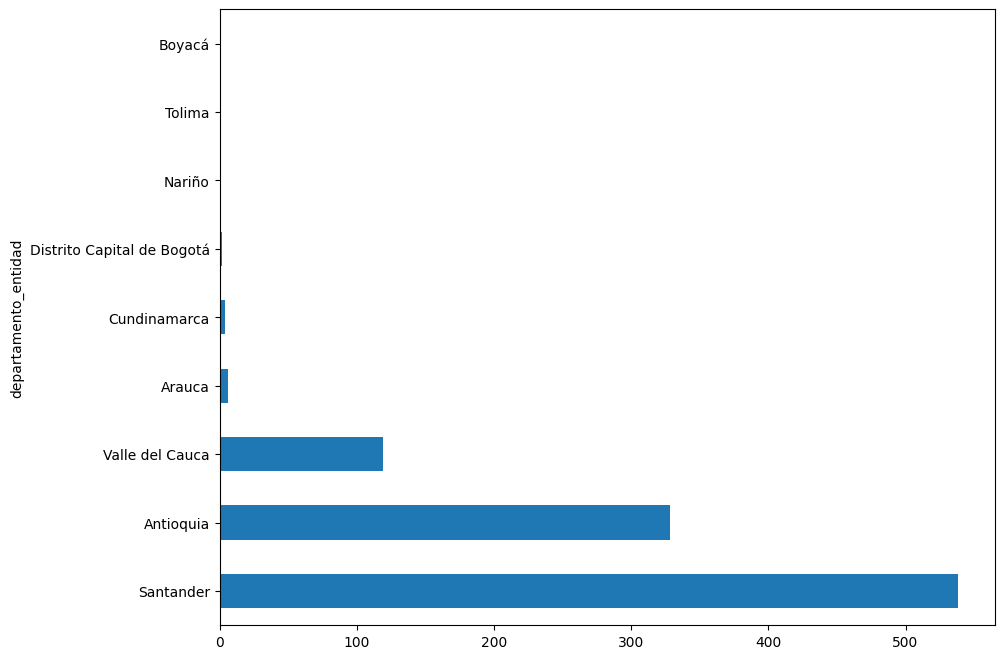

In [13]:
df['departamento_entidad'].value_counts().plot(kind='barh', figsize=(10, 8))


2. Monto total contratado por municipio o departamento:

<Axes: xlabel='departamento_entidad'>

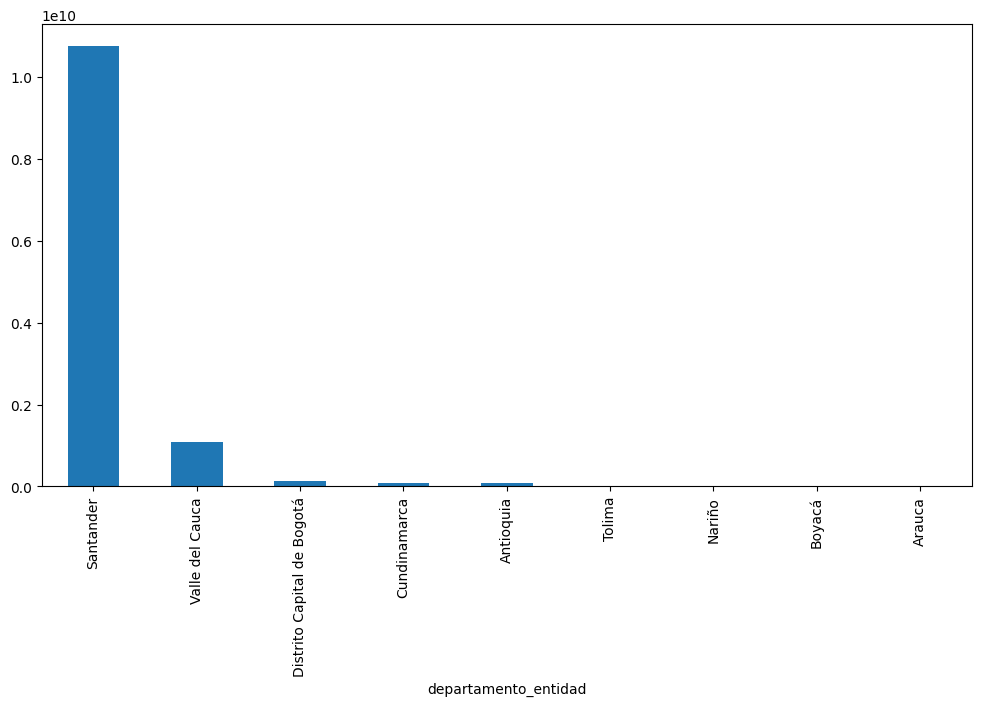

In [14]:
df.groupby('departamento_entidad')['valor_contrato'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))


3. Contratos por tipo o modalidad:

<Axes: ylabel='count'>

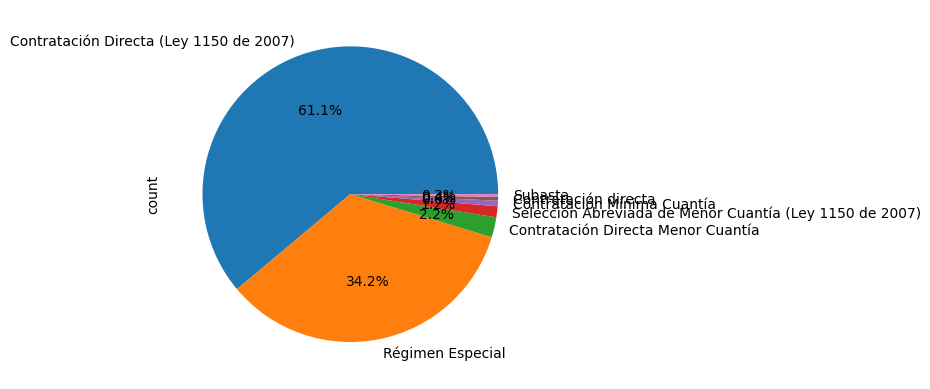

In [16]:
df['modalidad_contratacion'].value_counts().plot(kind='pie', autopct='%1.1f%%')
